In [20]:
import pickle_util
import pandas as pd
import numpy as np

from sklearn.externals import joblib

from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift

%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [35]:
# config
# g_name = 'dev'
g_name = 'train'

In [36]:
# config
f_name = g_name
f_name_vocab = 'vocab_'+g_name
f_name_content = 'X_content_'+g_name
f_name_entities = 'X_entities_'+g_name
f_name_terms_content = 'terms_content_'+g_name
f_name_terms_entities = 'terms_entities_'+g_name
# load data
data = pickle_util.load_obj(f_name)
vocab = pickle_util.load_obj(f_name_vocab)
X_content = pickle_util.load_obj(f_name_content)
X_entities = pickle_util.load_obj(f_name_entities)
terms_content = pickle_util.load_obj(f_name_terms_content)
terms_entities = pickle_util.load_obj(f_name_terms_entities)

In [104]:
def kmeans_cluster(X, g_name, num_clusters=100):
    model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1)
    model.fit(X)
    clusters = model.labels_.tolist()
    joblib.dump(model, '../models/kmeans_'+g_name+'.pkl')
    return [model, clusters]

In [105]:
print X_content.shape

(100, 40)


In [106]:
def print_cluster_terms(model, terms):
    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    for i in range(model.n_clusters):
        print "Cluster %d:" % i
        for ind in order_centroids[i, :15]:
            print ' %s' % terms[ind], 
        print

In [107]:
def plot_cluster_counts(model):
    label_counts = {}
    for label in model.labels_:
        try:
            label_counts[label] +=1
        except:
            label_counts[label] = 0

    print label_counts
    print type(label_counts.keys()), " ", type(label_counts.values())

    plt.bar(label_counts.keys(), label_counts.values())

In [4]:
def reduce_and_plot_clusters(X, model, labels):
    X_reduced = TruncatedSVD().fit_transform(X)
    X_embedded = TSNE(learning_rate=100).fit_transform(X_reduced)
    # X_pca = PCA().fit_transform(content_mat)
    # Creating a discrete colorbar
#     colors = np.linspace(0, 1, model.n_clusters)
    fig = figure(figsize=(10, 10))
    ax = axes(frameon=False)
    setp(ax, xticks=(), yticks=())
    subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    scatter(X_embedded[:, 0], X_embedded[:, 1], marker="x", c=labels, cmap=cm.jet)

## Content

In [111]:
[model_content, clusters_content] = kmeans_cluster(X_content, g_name, num_clusters=5)

In [112]:
print_cluster_terms(model_content, terms_content)

Top terms per cluster:
Cluster 0:
 state  year  week  includ  time  day  unit  said  need  use  's  market  make  just  right
Cluster 1:
 's  said  n't  report  year  time  ani  like  befor  share  new  week  sinc  look  just
Cluster 2:
 market  septemb  new  year  help  time  servic  share  report  work  make  provid  includ  like  today
Cluster 3:
 unit  follow  befor  septemb  new  's  report  said  day  like  help  look  just  inform  includ
Cluster 4:
 compani  inform  's  product  servic  provid  manag  use  ani  includ  help  unit  said  state  today


{0: 4, 1: 24, 2: 44, 3: 4, 4: 19}
<type 'list'>   <type 'list'>


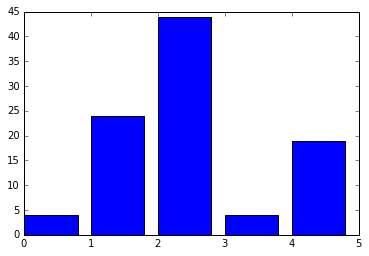

In [113]:
plot_cluster_counts(model_content)

In [ ]:
reduce_and_plot_clusters(X_content, model_content, clusters_content)

## Entities

In [115]:
[model_entities, clusters_entities] = kmeans_cluster(X_entities, g_name, num_clusters=5)

In [116]:
print_cluster_terms(model_entities, terms_entities)

Top terms per cluster:
Cluster 0:
 turkey  rights  animal  goat  goat animal  goats  goats nepalese  animal rights  nepalese goat  nepalese  nepal goats  nepal  pendlebury  international  diyarbakir
Cluster 1:
 china  amazon  florida  interstate  porsche  bechtel  securities  bmo  coshocton  oil  psychic  stock  bank  bail  craig
Cluster 2:
 citi  new  ukraine  colbert  united  beverley  york  new york  krups  coupons  eels  washington  god  officer  chief
Cluster 3:
 state  hyundai  strata  tackles  benin  albuquerque  pornography  child pornography  child  county  university  maryland  dakota state  dakota  state university
Cluster 4:
 alfresco  mercer  healthcare  idc  enterprise  apple enterprise  mercer mercer  management  stewart  justice stewart  apple  alfresco alfresco  justice  cross  country


{0: 1, 1: 45, 2: 33, 3: 8, 4: 8}
<type 'list'>   <type 'list'>


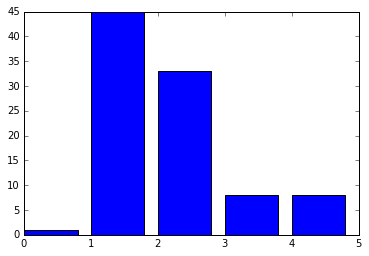

In [117]:
plot_cluster_counts(model_entities)

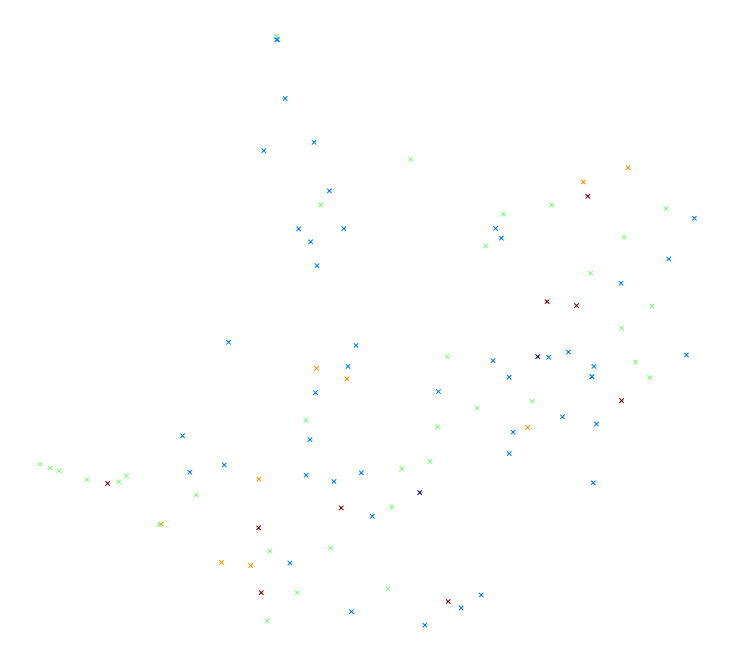

In [118]:
reduce_and_plot_clusters(X_entities, model_entities, clusters_entities)

In [37]:
db_model_entities = DBSCAN(metric='cosine',  algorithm='brute', eps=0.9)
db_model_entities.fit(X_entities)

DBSCAN(algorithm='brute', eps=0.9, leaf_size=30, metric='cosine',
    min_samples=5, p=None, random_state=None)

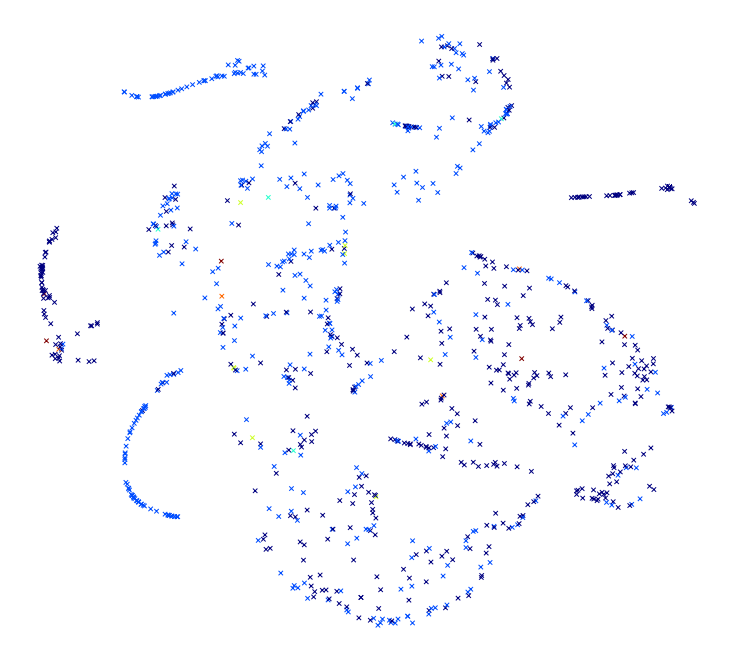

In [38]:
reduce_and_plot_clusters(X_entities, db_model_entities, db_model_entities.labels_)

In [18]:
spectral_entities = SpectralClustering(affinity='nearest_neighbors', n_clusters=5)
spectral_entities.fit(X_entities)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=5, n_init=10, n_neighbors=10,
          random_state=None)

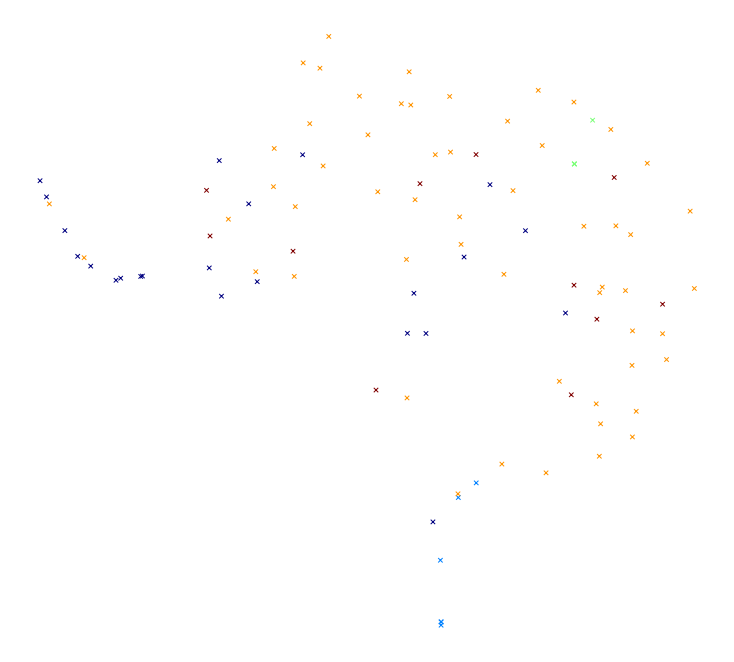

In [19]:
reduce_and_plot_clusters(X_entities, spectral_entities, spectral_entities.labels_)

In [22]:
meanshift_entities = MeanShift()
meanshift_entities.fit(X_entities.toarray())
meanshift_labels = meanshift_entities.labels_
meanshift_cluster_centers = meanshift_entities.cluster_centers_

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

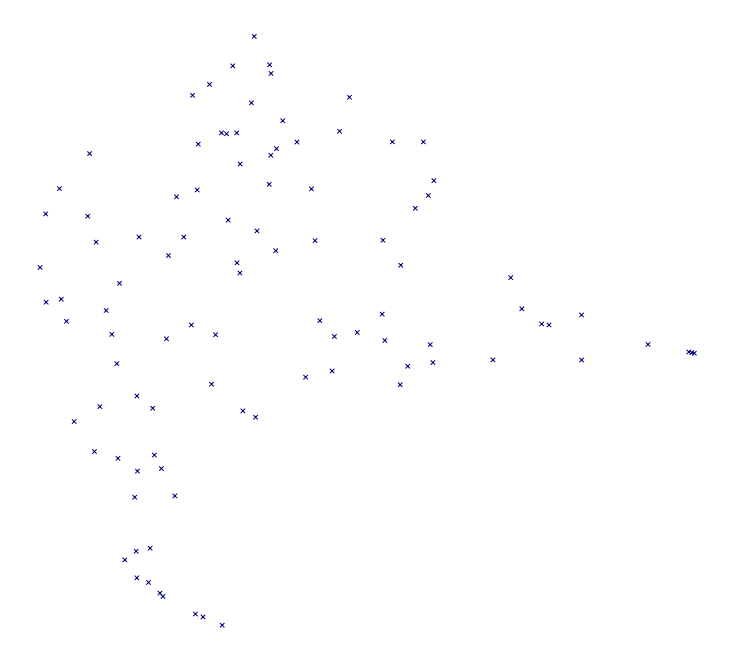

In [34]:
reduce_and_plot_clusters(X_entities, meanshift_entities, meanshift_entities.labels_)

In [30]:
print X_entities.shape[0]

100
